# Testing and regularization

In [1]:
!git clone https://github.com/AbdelrhmanElsaied/ml-1
%cd  ml-1/polynomial_regression

Cloning into 'ml-1'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 112 (delta 55), reused 112 (delta 55), pack-reused 0 (from 0)
Receiving objects: 100% (112/112), 29.74 MiB | 4.97 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Updating files: 100% (39/39), done.
/content/ml-1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

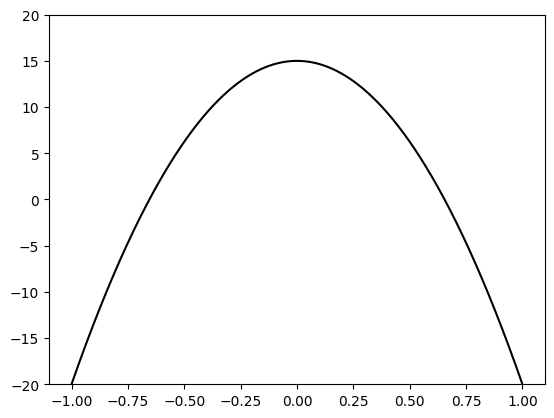

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

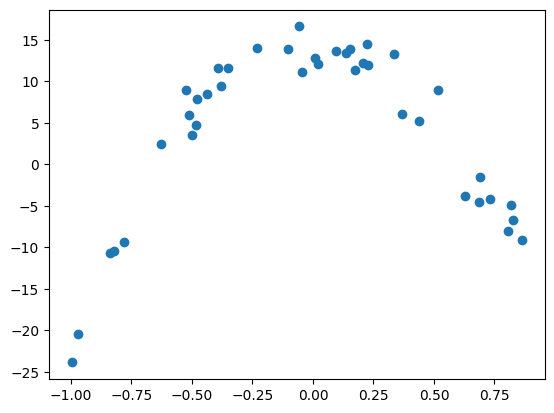

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(np.float64(0.6888437030500962), np.float64(-1.503313676546703))
(np.float64(-0.4821664994140733), np.float64(4.776223391096098))
(np.float64(0.02254944273721704), np.float64(12.087957039273702))
(np.float64(-0.3933745478421451), np.float64(11.552655381342872))
(np.float64(-0.04680609169528838), np.float64(11.13939451533042))
(np.float64(0.009373711634780513), np.float64(12.810729063756577))
(np.float64(-0.43632431120059234), np.float64(8.437955069843738))
(np.float64(-0.4989873172751189), np.float64(3.511211911084044))
(np.float64(0.8194925119364802), np.float64(-4.879955934160179))
(np.float64(0.8043319008791654), np.float64(-8.0368585173616))
(np.float64(-0.37970486136133474), np.float64(9.412786903432224))
(np.float64(0.36796786383088254), np.float64(6.014161594638752))
(np.float64(-0.055714569094573285), np.float64(16.612588226930765))
(np.float64(0.2217739468876032), np.float64(14.540743210654112))
(np.float64(0.8260221064757964), np.float64(-6.653701461777612))
(np.float64(0.730

In [8]:
len(X)

40

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [19]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    X = np.array(X).reshape(-1, 1)
    poly=PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)

    return X
X_poly=addPoly(X,200)

In [20]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2,random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [29]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data
# normalization trick ;)


model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.5021603134748135
Testing error (rmse): 6031852.598066654


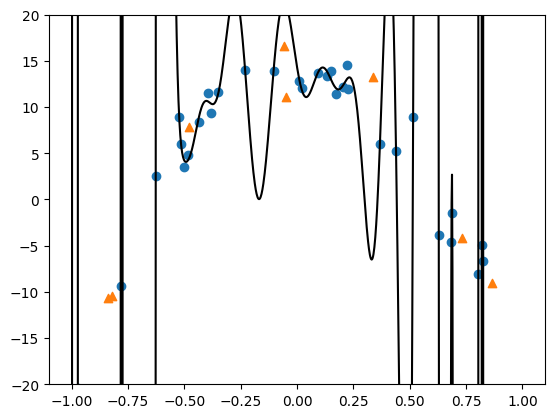

Polynomial coefficients
[np.float64(14.380955395192496), np.float64(-150.54619067068953), np.float64(1096.947142093283), np.float64(23022.917471837776), np.float64(-167158.12709298765), np.float64(-1059851.0120530215), np.float64(7171983.841137485), np.float64(24500947.20775801), np.float64(-143037130.66408786), np.float64(-338580291.851852), np.float64(1564242282.8826776), np.float64(2931788574.8204565), np.float64(-10063360919.336588), np.float64(-15887373258.659887), np.float64(38683163051.41199), np.float64(52090322497.14409), np.float64(-84786962251.19148), np.float64(-93597779268.7732), np.float64(85751199357.19736), np.float64(62251404329.5736), np.float64(6988289964.869613), np.float64(41419136670.96826), np.float64(-58296540805.823814), np.float64(-39447282544.51514), np.float64(-27097357901.732536), np.float64(-46644432542.38863), np.float64(24417210024.205147), np.float64(-4896454949.17553), np.float64(43547023304.72211), np.float64(28404814694.298588), np.float64(2939704709

In [30]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [34]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.01)
model_L1_reg.fit(X_train, y_train)

Lasso(alpha=0.01)

Training error (rmse): 1.8821842143935315
Testing error (rmse): 1.989958874368075


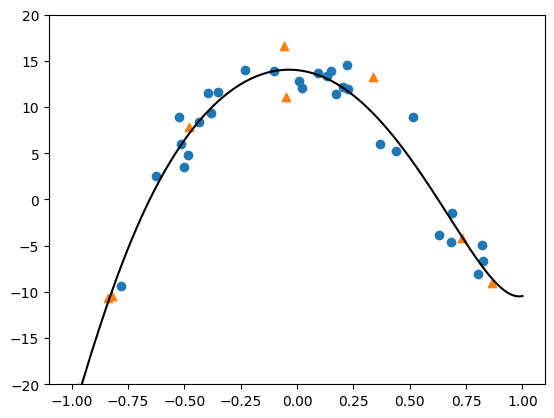

Polynomial coefficients
[np.float64(14.000708182162112), np.float64(-2.43499396014219), np.float64(-34.147465538952524), np.float64(0.0), np.float64(0.0), np.float64(9.015487398349984), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(3.1166909760786305), np.float64(0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0)

In [35]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [36]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=0.01)
model_L2_reg.fit(X_train, y_train)

Ridge(alpha=0.01)

Training error (rmse): 1.7905246275344273
Testing error (rmse): 2.6640350095477325


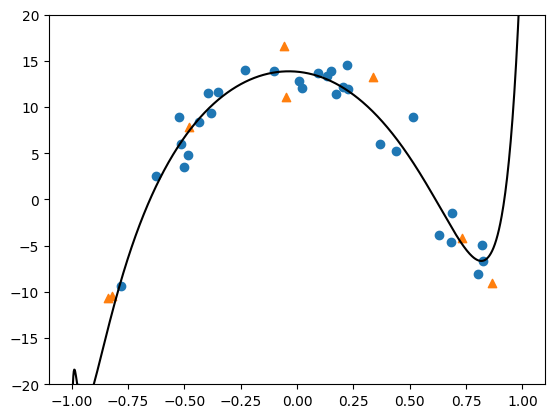

Polynomial coefficients
[np.float64(13.830735181954708), np.float64(-2.1789340128731283), np.float64(-30.101332247076044), np.float64(-1.4346331091155378), np.float64(-10.926396378064), np.float64(3.961291628347915), np.float64(-0.8106007615081978), np.float64(6.723194281432924), np.float64(3.0134492557136667), np.float64(6.784714736318699), np.float64(4.1942692507294375), np.float64(5.500098764060397), np.float64(4.233709681018816), np.float64(3.9197524262937717), np.float64(3.8279907537738467), np.float64(2.5247698159844436), np.float64(3.3014560365389194), np.float64(1.4486892027926004), np.float64(2.7927586684237404), np.float64(0.6761687668108101), np.float64(2.351175432912914), np.float64(0.1468427414989728), np.float64(1.986010727081517), np.float64(-0.20218214466355455), np.float64(1.6906151498625173), np.float64(-0.42289730022935323), np.float64(1.4533983440319247), np.float64(-0.554498341290774), np.float64(1.2625205146616105), np.float64(-0.6252386004024792), np.float64(1.10

In [37]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [38]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.336306,13.258006,-6.278048e+00,9.358500,9.519216
1,-0.479015,7.824063,4.439285e+00,7.106387,7.402155
2,0.730620,-4.157484,-8.402028e+03,-3.994438,-4.768478
3,-0.839108,-10.658485,-1.466719e+07,-11.210457,-14.053558
4,-0.046806,11.139395,2.096609e+01,14.039868,13.866870
5,-0.055715,16.612588,2.131280e+01,14.030370,13.858836
6,-0.820351,-10.449481,-3.476118e+06,-9.901518,-12.289243
7,0.865668,-9.073495,7.991021e+06,-8.577341,-5.564468


### Real Example (Predict fuel efficiency)

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [41]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### normal linear regression

In [43]:
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


#### using 50th order

In [44]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [ ]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression(normalize=True)
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

62673.21197656972


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


##### lasso regularization

In [ ]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01,normalize=True)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.020606257556758


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


##### ridge regularization

In [ ]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01,normalize=True)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.7867550327271036


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
